# LDA Model Hyperparameter Tuning

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5907f4b4dffa2dd05406809beab563a9c81f3c6c0b9e36591791a6bed8583b17
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=bf0567b9508679e14f7f5a3bfec46e90fc4b433c6664b86f75d73d44b48a3e2b
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [ ]:
import pandas as pd
import ast
import pickle
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
from gensim.models import CoherenceModel
from gensim.test.utils import datapath

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls /content/drive/MyDrive/Capstone\ Data\ with\ claims

2018-data-merged.csv  LDA_results	    output.csv
2019-data-merged.csv  lsa_model_2018.pkl    tf_idf_final.pkl
2020-data-merged.csv  lsa_model_2019.pkl    Topics-2018-data-merged.csv
2021-data-merged.csv  lsa_model_2020.pkl    Topics-2019-data-merged.csv
2022-data-merged.csv  lsa_model_2021.pkl    Topics-2020-data-merged.csv
allyears_all_new.pkl  lsa_model_2022.pkl    Topics-2021-data-merged.csv
allyears_all.pkl      out-corpus-tfidf.csv  Topics-2022-data-merged.csv
corpus_tf_idf.pkl     out.csv
demo_matrix_file.csv  outer_list.pkl


In [ ]:
%cd /content/drive/MyDrive/Capstone\ Data\ with\ claims

/content/drive/.shortcut-targets-by-id/17UPJss-qut16zQytPVFt4NF5eY1h7yKf/Capstone Data with claims


In [ ]:
word_mat = pd.read_pickle('allyears_all_new.pkl')
word_mat = word_mat.T.reset_index().T
word_mat.drop('level_0',inplace=True)
word_mat = word_mat.T
word_mat = word_mat.drop(columns = ['third', 'say', 'wherein', 'less' , 'c' , 'b' , 'fourth' , 'array',
                          'accord', 'device', 'method', 'comprise','comprising', 'compare' ,  'whether' , 'without' ,'within',
                          'comprises', 'include', 'portion','determine', 'ratio' , 'two' , 'point' , 'period',
                          'select','position','set','use','end' , 'id'  , 'data' ,  '0', '01', '05', '1', '10', '100', '12', '15', '2', '20',
                           '200', '25', '3', '30', '4', '40', '5', '50', '500', '6' ,  '60', '70', '8', '80', '90','group' , 'cancel' , 'acceptable'])

In [ ]:
"""
cols = []
for k, v in id2word.iteritems():
    cols.append(v)

word_mat = word_mat[cols]
"""
id2word = corpora.Dictionary([list(word_mat.columns)])

In [ ]:
pickle_in = open("outer_list.pkl","rb")
outer_list_pkl = pickle.load(pickle_in)

In [ ]:
def compute_coherence_values(id2word, corpus_tfidf, limit, start=2, step=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word = id2word)
        coherencemodel = CoherenceModel(model=model, corpus = corpus_tfidf, dictionary=id2word, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

In [ ]:
year = 2018
df_lengths = [1,150456,307779,469536,628516,751018]
tuning_data = []
print('=================================================================')
for j in range(5):
  print('We are processing for the year ',int(year+j),'...')
  outer_list_year = outer_list_pkl[df_lengths[j]-1:df_lengths[j+1]]
  tfidf = models.TfidfModel(outer_list_year)
  corpus_tfidf = tfidf[outer_list_year]
  coherence_values = compute_coherence_values(id2word, corpus_tfidf, start=2, limit=30, step=2)
  tuning_data.append((coherence_values))

In [ ]:
corpus_tfidf.corpus[0]

[(34, 1.0),
 (90, 6.0),
 (104, 6.0),
 (150, 14.0),
 (223, 13.0),
 (275, 1.0),
 (445, 1.0),
 (472, 2.0),
 (475, 32.0)]

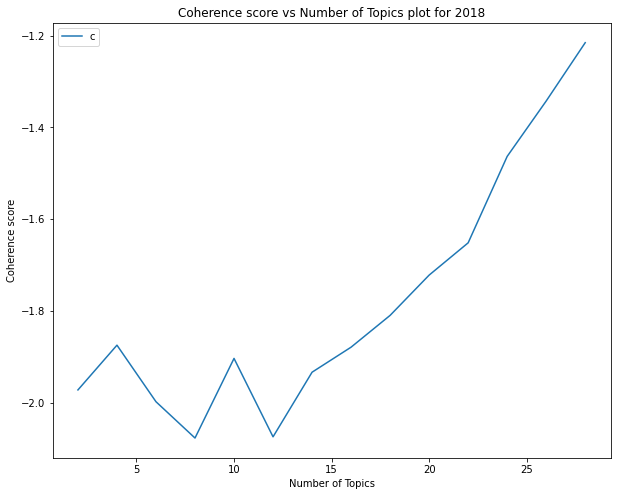

In [ ]:
import matplotlib.pyplot as plt
x = range(2, 30, 2)
plt.figure(figsize = (10,8))


plt.plot(x, [e+0.005*(j**2) for j,e in enumerate(tuning_data[0])])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2018')
plt.show()
### OPTIMAL parameter = 8

In [ ]:
temp = range(2, 30, 2)
for idx in range(len(temp)):
  print(temp[idx], ":", tuning_data[0][idx])

2 : -1.972146633104436
4 : -1.879625913109888
6 : -2.0178376841560026
8 : -2.1219536812532356
10 : -1.9834759484968398
12 : -2.1993149226289717
14 : -2.11352970545432
16 : -2.12395572101942
18 : -2.129702480940868
20 : -2.126951836407439
22 : -2.1516214404178893
24 : -2.0683375291453214
26 : -2.06260204821798
28 : -2.0605073059031884


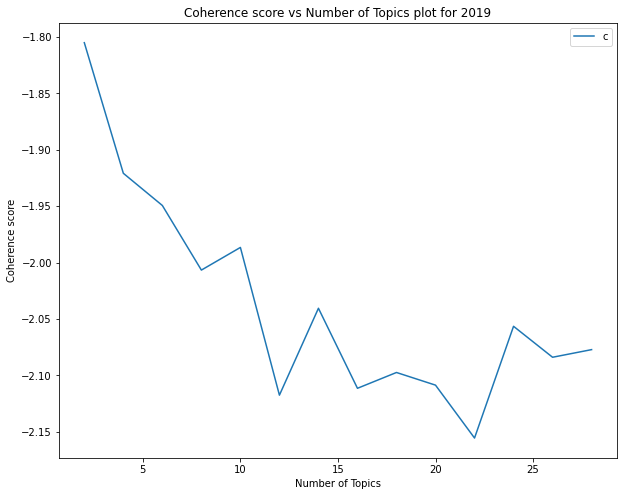

In [ ]:
import matplotlib.pyplot as plt
x = range(2, 30, 2)
plt.figure(figsize = (10,8))
plt.plot(x, tuning_data[1])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2019')
plt.show()
### OPTIMAL parameter = 12

In [ ]:
temp = range(2, 30, 2)
for idx in range(len(temp)):
  print(temp[idx], ":", tuning_data[1][idx])

2 : -1.8049802987439891
4 : -1.9208147533221596
6 : -1.94937906150255
8 : -2.0066718679268014
10 : -1.986586676659759
12 : -2.1176119490865575
14 : -2.0405379911540398
16 : -2.1115169031552514
18 : -2.0974977835058293
20 : -2.1087201721558166
22 : -2.155635683696101
24 : -2.0565275012407382
26 : -2.083989046147845
28 : -2.0772250661962177


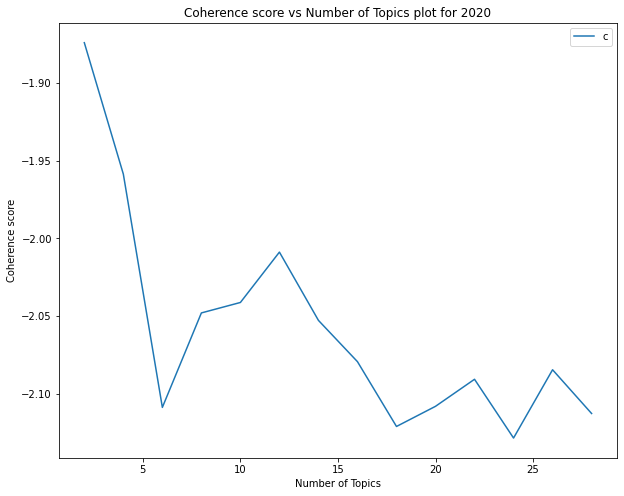

In [ ]:
import matplotlib.pyplot as plt
x = range(2, 30, 2)
plt.figure(figsize = (10,8))
plt.plot(x, tuning_data[2])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2020')
plt.show()
### OPTIMAL parameter = 6

In [ ]:
temp = range(2, 30, 2)
for idx in range(len(temp)):
  print(temp[idx], ":", tuning_data[2][idx])

2 : -1.8740527612318636
4 : -1.9586697661285177
6 : -2.108877485925787
8 : -2.0480487684546387
10 : -2.0413180952194923
12 : -2.008892720688348
14 : -2.0528467760182805
16 : -2.0794268670987535
18 : -2.12115488718053
20 : -2.1081809122511657
22 : -2.0907684993809275
24 : -2.1285991231505834
26 : -2.084637631010991
28 : -2.112799987976256


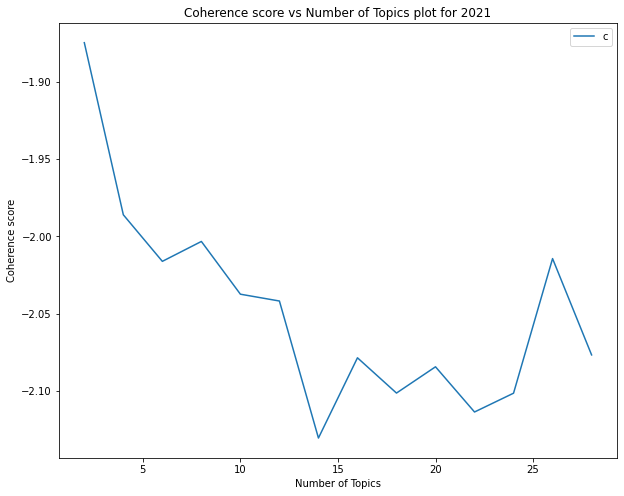

In [ ]:
import matplotlib.pyplot as plt
x = range(2, 30, 2)
plt.figure(figsize = (10,8))
plt.plot(x, tuning_data[3])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2021')
plt.show()
### OPTIMAL parameter = 14

In [ ]:
temp = range(2, 30, 2)
for idx in range(len(temp)):
  print(temp[idx], ":", tuning_data[3][idx])

2 : -1.8748516555208865
4 : -1.986103813166634
6 : -2.0161991778401336
8 : -2.0033362803984436
10 : -2.037431005536541
12 : -2.0418386019270574
14 : -2.1304100098147942
16 : -2.07854350047153
18 : -2.1013407611657655
20 : -2.0843648968137254
22 : -2.1135767219611528
24 : -2.101422179308847
26 : -2.0144096909409765
28 : -2.0766743194387898


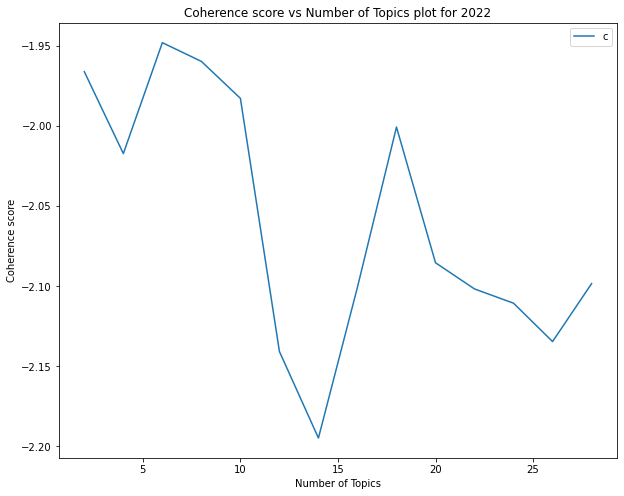

In [ ]:
import matplotlib.pyplot as plt
x = range(2, 30, 2)
plt.figure(figsize = (10,8))
plt.plot(x, tuning_data[4])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2022')
plt.show()
### OPTIMAL parameter = 14

In [ ]:
temp = range(2, 30, 2)
for idx in range(len(temp)):
  print(temp[idx], ":", tuning_data[4][idx])

2 : -1.9660104581013544
4 : -2.0171644125395054
6 : -1.9479084460155047
8 : -1.95958301272778
10 : -1.9826598038998047
12 : -2.140746251088451
14 : -2.1948003878478373
16 : -2.1006032575006937
18 : -2.0005999952931286
20 : -2.0853466058227697
22 : -2.1016926626365215
24 : -2.110600210206828
26 : -2.1345499839881863
28 : -2.0983740664160835


## Re-training Model with optimum no. of topics

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
df_lengths = [1,150456,307779,469536,628516,751018]

In [ ]:
%cd /content/drive/My Drive/Capstone/Capstone Project/Capstone Data with claims/LDA_results

/content/drive/.shortcut-targets-by-id/1CE8VB6qMzazuyyFbb_EaMzD5uwK0eBm6/Capstone/Capstone Project/Capstone Data with claims/LDA_results


### 2018

In [ ]:
outer_list_year = outer_list_pkl[df_lengths[0]-1:df_lengths[1]]
tfidf = models.TfidfModel(outer_list_year)
corpus_tfidf = tfidf[outer_list_year]
model_2018 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word = id2word)

In [ ]:
topics_list = []
for idx, topic in model_2018.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))
  topics_list.append('Topic: {} \nWords: {}'.format(idx, topic))

lda_model_filepath = 'lda_model_2018_topics_words'
with open(lda_model_filepath, 'wb') as f:
  pickle.dump(topics_list, f)

pyLDAvis.enable_notebook()
LDAvis_data_filepath = 'ldavis_prepared_2018'

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_2018, outer_list_year, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_2018' + '.html')

Topic: 0 
Words: 0.035*"acid" + 0.025*"composition" + 0.024*"consist" + 0.022*"thereof" + 0.021*"agent" + 0.020*"weight" + 0.018*"cell" + 0.016*"sequence" + 0.016*"compound" + 0.014*"step"
Topic: 1 
Words: 0.031*"signal" + 0.022*"voltage" + 0.018*"output" + 0.016*"power" + 0.014*"circuit" + 0.014*"frequency" + 0.013*"current" + 0.013*"control" + 0.012*"value" + 0.011*"cell"
Topic: 2 
Words: 0.021*"image" + 0.016*"sensor" + 0.016*"value" + 0.015*"system" + 0.013*"object" + 0.010*"information" + 0.010*"time" + 0.010*"base" + 0.009*"display" + 0.009*"model"
Topic: 3 
Words: 0.013*"surface" + 0.012*"plate" + 0.012*"chamber" + 0.012*"side" + 0.012*"valve" + 0.011*"housing" + 0.011*"wall" + 0.011*"assembly" + 0.011*"section" + 0.010*"fluid"
Topic: 4 
Words: 0.021*"member" + 0.017*"surface" + 0.015*"direction" + 0.014*"body" + 0.013*"element" + 0.013*"axis" + 0.011*"side" + 0.011*"extend" + 0.010*"shaft" + 0.010*"support"
Topic: 5 
Words: 0.019*"information" + 0.019*"apparatus" + 0.015*"netwo

In [ ]:
model_2018.save("LDA_model_2018")

## 2019

In [ ]:
outer_list_year = outer_list_pkl[df_lengths[1]-1:df_lengths[2]]
tfidf = models.TfidfModel(outer_list_year)
corpus_tfidf = tfidf[outer_list_year]
model_2019 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=12, id2word = id2word)

In [ ]:
topics_list = []
for idx, topic in model_2019.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))
  topics_list.append('Topic: {} \nWords: {}'.format(idx, topic))

lda_model_filepath = 'lda_model_2019_topics_words'
with open(lda_model_filepath, 'wb') as f:
  pickle.dump(topics_list, f)

pyLDAvis.enable_notebook()
LDAvis_data_filepath = 'ldavis_prepared_2019'

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_2019, outer_list_year, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_2019' + '.html')

Topic: 0 
Words: 0.026*"flow" + 0.024*"fluid" + 0.023*"valve" + 0.022*"chamber" + 0.021*"gas" + 0.020*"pressure" + 0.014*"air" + 0.013*"element" + 0.013*"mm" + 0.011*"outlet"
Topic: 1 
Words: 0.022*"member" + 0.018*"direction" + 0.016*"surface" + 0.015*"axis" + 0.014*"body" + 0.014*"side" + 0.012*"extend" + 0.012*"element" + 0.011*"assembly" + 0.011*"housing"
Topic: 2 
Words: 0.032*"layer" + 0.025*"surface" + 0.020*"material" + 0.016*"substrate" + 0.015*"conductive" + 0.014*"form" + 0.013*"region" + 0.013*"side" + 0.012*"structure" + 0.011*"top"
Topic: 3 
Words: 0.031*"apparatus" + 0.031*"signal" + 0.029*"sensor" + 0.020*"measurement" + 0.016*"filter" + 0.015*"frequency" + 0.013*"value" + 0.012*"phase" + 0.012*"circuitry" + 0.011*"vector"
Topic: 4 
Words: 0.044*"computer" + 0.037*"medium" + 0.037*"program" + 0.030*"nontransitory" + 0.029*"processor" + 0.028*"instruction" + 0.027*"system" + 0.025*"computerreadable" + 0.024*"storage" + 0.023*"cause"
Topic: 5 
Words: 0.023*"information" +

In [ ]:
model_2019.save("LDA_model_2019")

## 2020

In [ ]:
outer_list_year = outer_list_pkl[df_lengths[2]-1:df_lengths[3]]
tfidf = models.TfidfModel(outer_list_year)
corpus_tfidf = tfidf[outer_list_year]
model_2020 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=6, id2word = id2word)

In [ ]:
topics_list = []
for idx, topic in model_2020.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))
  topics_list.append('Topic: {} \nWords: {}'.format(idx, topic))

lda_model_filepath = 'lda_model_2020_topics_words'
with open(lda_model_filepath, 'wb') as f:
  pickle.dump(topics_list, f)

pyLDAvis.enable_notebook()
LDAvis_data_filepath = 'ldavis_prepared_2020'

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_2020, outer_list_year, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_2020' + '.html')

Topic: 0 
Words: 0.032*"acid" + 0.023*"composition" + 0.021*"cell" + 0.021*"consist" + 0.020*"thereof" + 0.019*"weight" + 0.019*"agent" + 0.017*"sequence" + 0.015*"amount" + 0.014*"step"
Topic: 1 
Words: 0.023*"signal" + 0.019*"image" + 0.016*"sensor" + 0.016*"voltage" + 0.016*"light" + 0.013*"circuit" + 0.012*"output" + 0.012*"control" + 0.012*"unit" + 0.012*"power"
Topic: 2 
Words: 0.037*"layer" + 0.022*"material" + 0.018*"surface" + 0.016*"electrode" + 0.015*"substrate" + 0.013*"region" + 0.012*"form" + 0.012*"metal" + 0.011*"conductive" + 0.011*"structure"
Topic: 3 
Words: 0.023*"user" + 0.023*"information" + 0.017*"system" + 0.012*"message" + 0.011*"associate" + 0.010*"server" + 0.010*"resource" + 0.010*"network" + 0.010*"request" + 0.010*"communication"
Topic: 4 
Words: 0.027*"computer" + 0.025*"medium" + 0.023*"system" + 0.023*"processor" + 0.021*"program" + 0.021*"nontransitory" + 0.020*"instruction" + 0.018*"computerreadable" + 0.017*"apparatus" + 0.016*"storage"
Topic: 5 
Wor

In [ ]:
model_2020.save("LDA_model_2020")

## 2021

In [ ]:
outer_list_year = outer_list_pkl[df_lengths[3]-1:df_lengths[4]]
tfidf = models.TfidfModel(outer_list_year)
corpus_tfidf = tfidf[outer_list_year]
model_2021 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=14, id2word = id2word)

In [ ]:
topics_list = []
for idx, topic in model_2021.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))
  topics_list.append('Topic: {} \nWords: {}'.format(idx, topic))

lda_model_filepath = 'lda_model_2021_topics_words'
with open(lda_model_filepath, 'wb') as f:
  pickle.dump(topics_list, f)

pyLDAvis.enable_notebook()
LDAvis_data_filepath = 'ldavis_prepared_2021'

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_2021, outer_list_year, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_2021' + '.html')

Topic: 0 
Words: 0.040*"element" + 0.035*"gas" + 0.027*"heat" + 0.019*"temperature" + 0.018*"pressure" + 0.014*"module" + 0.013*"step" + 0.011*"supply" + 0.011*"liquid" + 0.011*"flow"
Topic: 1 
Words: 0.030*"region" + 0.021*"surface" + 0.019*"structure" + 0.016*"material" + 0.015*"body" + 0.014*"mm" + 0.014*"gate" + 0.014*"fiber" + 0.013*"width" + 0.013*"segment"
Topic: 2 
Words: 0.037*"computer" + 0.034*"medium" + 0.029*"nontransitory" + 0.028*"processor" + 0.028*"program" + 0.028*"system" + 0.024*"instruction" + 0.023*"computerreadable" + 0.022*"storage" + 0.021*"cause"
Topic: 3 
Words: 0.021*"member" + 0.019*"surface" + 0.016*"side" + 0.016*"direction" + 0.014*"axis" + 0.012*"support" + 0.012*"body" + 0.012*"extend" + 0.011*"wall" + 0.010*"arm"
Topic: 4 
Words: 0.025*"signal" + 0.025*"resource" + 0.024*"claim" + 0.022*"frequency" + 0.019*"transmission" + 0.019*"information" + 0.018*"image" + 0.017*"channel" + 0.015*"message" + 0.015*"transmit"
Topic: 5 
Words: 0.022*"sensor" + 0.021

In [ ]:
model_2021.save("LDA_model_2021")

## 2022

In [ ]:
outer_list_year = outer_list_pkl[df_lengths[4]-1:df_lengths[5]]
tfidf = models.TfidfModel(outer_list_year)
corpus_tfidf = tfidf[outer_list_year]
model_2022 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=14, id2word = id2word)

In [ ]:
topics_list = []
for idx, topic in model_2022.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))
  topics_list.append('Topic: {} \nWords: {}'.format(idx, topic))

lda_model_filepath = 'lda_model_2022_topics_words'
with open(lda_model_filepath, 'wb') as f:
  pickle.dump(topics_list, f)

pyLDAvis.enable_notebook()
LDAvis_data_filepath = 'ldavis_prepared_2022'

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model_2022, outer_list_year, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_2022' + '.html')

Topic: 0 
Words: 0.078*"layer" + 0.023*"region" + 0.023*"material" + 0.020*"structure" + 0.019*"gate" + 0.017*"conductive" + 0.017*"substrate" + 0.016*"electrode" + 0.015*"surface" + 0.015*"metal"
Topic: 1 
Words: 0.041*"sensor" + 0.022*"event" + 0.019*"component" + 0.016*"process" + 0.015*"system" + 0.015*"action" + 0.013*"detection" + 0.012*"block" + 0.011*"detect" + 0.010*"address"
Topic: 2 
Words: 0.038*"computer" + 0.033*"medium" + 0.030*"program" + 0.028*"processor" + 0.027*"nontransitory" + 0.024*"instruction" + 0.024*"computerreadable" + 0.022*"storage" + 0.021*"cause" + 0.020*"system"
Topic: 3 
Words: 0.031*"system" + 0.026*"user" + 0.024*"model" + 0.018*"compute" + 0.016*"display" + 0.013*"network" + 0.013*"application" + 0.013*"machine" + 0.012*"content" + 0.012*"processor"
Topic: 4 
Words: 0.024*"weight" + 0.024*"acid" + 0.021*"composition" + 0.020*"agent" + 0.020*"thereof" + 0.019*"consist" + 0.016*"compound" + 0.015*"polymer" + 0.014*"mixture" + 0.014*"material"
Topic: 5 

In [ ]:
model_2022.save("LDA_model_2022")